# Price prediction

## 1. Module Import

In [36]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## 2. Loading Data

In [37]:
df = pd.read_parquet('../data/yellow_tripdata_2023-01.parquet')

In [38]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

## 3.Feature Engineering

In [40]:
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime

In [41]:
df['duration'] = df['duration'].dt.total_seconds() / 60

In [42]:
df['duration'].head()

0     8.433333
1     6.316667
2    12.750000
3     9.616667
4    10.833333
Name: duration, dtype: float64

In [43]:
df_size = df.shape

In [44]:
df_iris = pd.read_csv("https://raw.githubusercontent.com/phamdinhkhanh/datasets/master/iris_train.csv", header=0, index_col=None)
df_iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,4.7,3.2,1.3,0.2,setosa
1,5.0,3.6,1.4,0.2,setosa
2,5.4,3.9,1.7,0.4,setosa
3,4.6,3.4,1.4,0.3,setosa
4,4.9,3.1,1.5,0.1,setosa


In [45]:
df_iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,105.000000,105.000000,105.000000,105.00000
mean,5.812381,3.076190,3.726667,1.18381
std,0.784305,0.455843,1.749080,0.74616
min,4.400000,2.200000,1.000000,0.10000
25%,5.200000,2.800000,1.600000,0.30000
50%,5.700000,3.000000,4.200000,1.30000
75%,6.300000,3.400000,5.100000,1.80000
max,7.900000,4.400000,6.900000,2.50000


In [46]:
import numpy as np

df_summary = df_iris[['Species', 'Petal.Length']].groupby('Species').mean()
x, y = list(df_summary.index), df_summary['Petal.Length'].values
print(x)
print(y)

['setosa', 'versicolor', 'virginica']
[1.47142857 4.18285714 5.52571429]


Text(0.5, 1.0, 'Average of Petal Length')

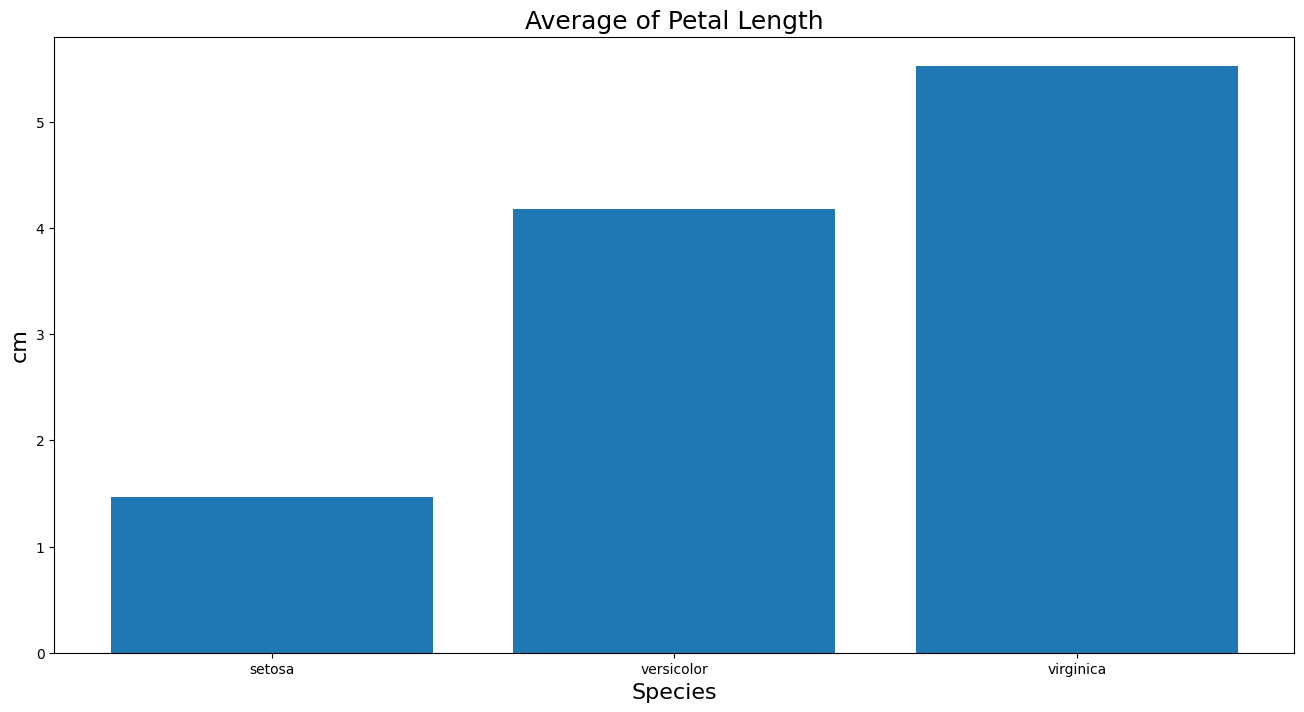

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
plt.bar(x, y)
plt.xlabel('Species', fontsize=16)
plt.ylabel('cm', fontsize=16)
plt.title("Average of Petal Length", fontsize=18)

Text(0.5, 1.0, 'Average of Petal Length')

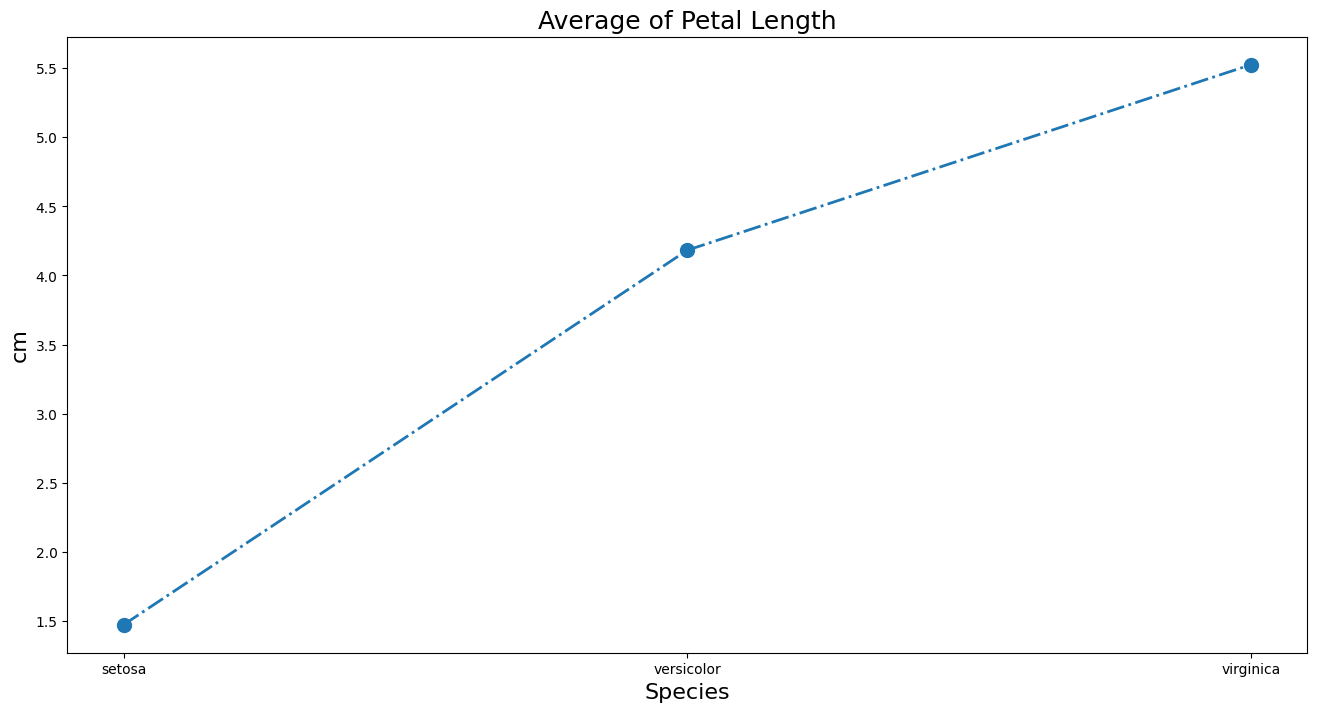

In [48]:
# Vẽ biểu đồ line độ dài cánh hoa trung bình giữa các loài hoa
plt.figure(figsize=(16, 8))
plt.plot(x, y, marker='o', markersize=10, linestyle='-.', linewidth=2)
plt.xlabel('Species', fontsize=16)
plt.ylabel('cm', fontsize=16)
plt.title("Average of Petal Length", fontsize=18)

Text(0.5, 1.0, 'Average of Petal Length')

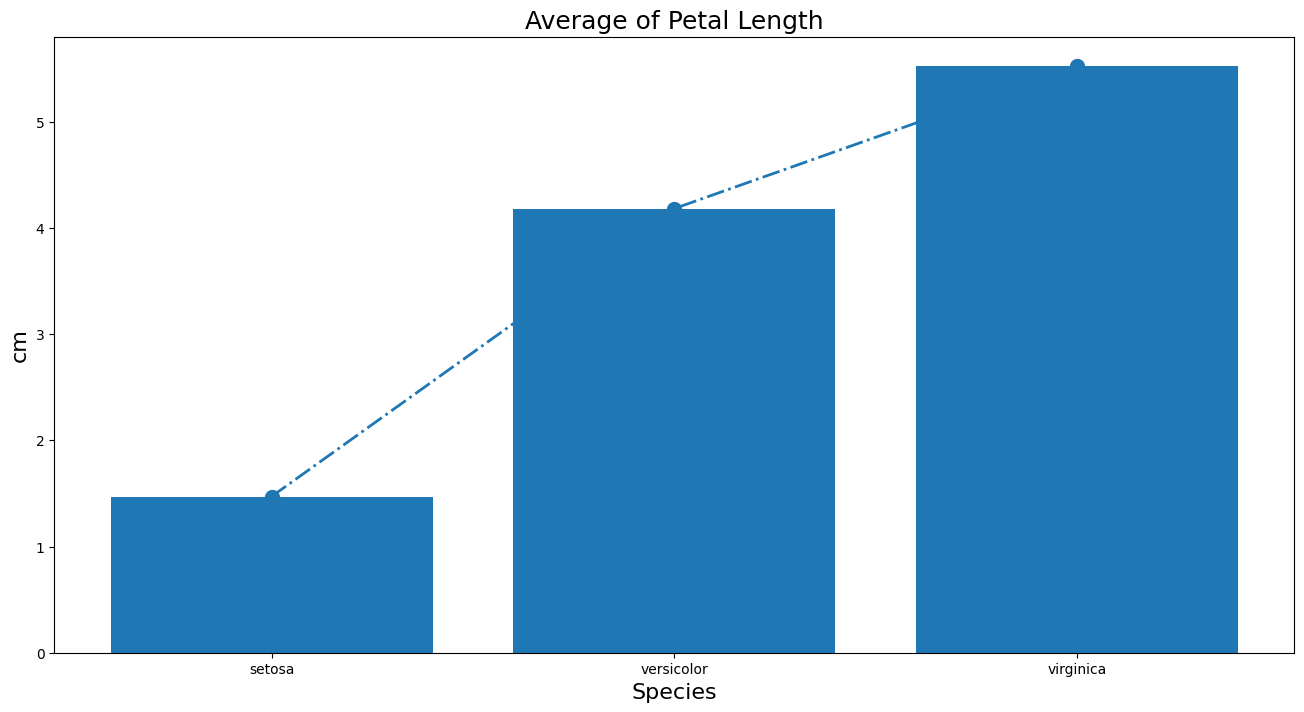

In [49]:
# Vẽ biểu đồ line độ dài cánh hoa trung bình giữa các loài hoa
plt.figure(figsize=(16, 8))
plt.bar(x, y)
plt.plot(x, y, marker='o', markersize=10, linestyle='-.', linewidth=2)
plt.xlabel('Species', fontsize=16)
plt.ylabel('cm', fontsize=16)
plt.title("Average of Petal Length", fontsize=18)

In [50]:
# Thống kê các loài hoa
x, y = np.unique(df_iris['Species'], return_counts = True)
print(x)
print(y)

['setosa' 'versicolor' 'virginica']
[35 35 35]


Text(0.5, 1.0, 'Average of Petal Length')

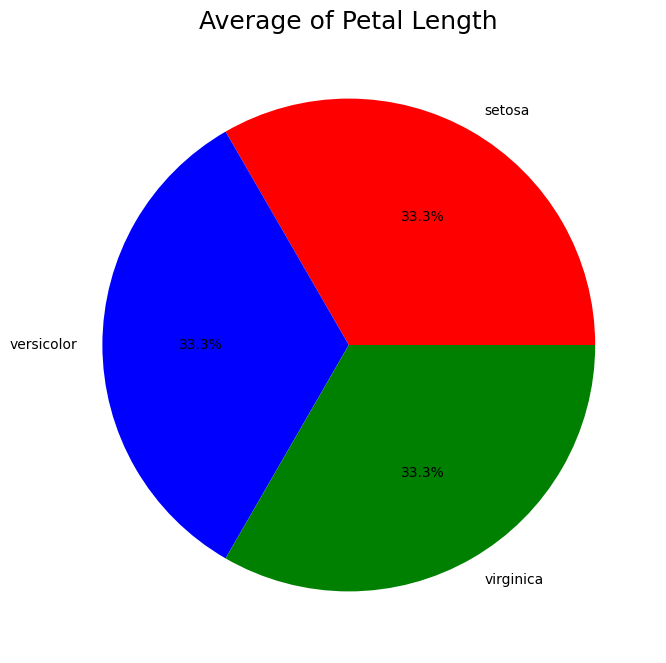

In [51]:
# Vẽ biểu đồ line độ dài cánh hoa trung bình giữa các loài hoa
plt.figure(figsize=(16, 8))
plt.pie(y,
        labels = x, # Nhãn của các nhóm
        colors = ['red', 'blue', 'green'], # Màu sắc của các nhóm
        autopct = '%1.1f%%', # Format hiển thị giá trị %
        shadow = False)
plt.title("Average of Petal Length", fontsize=18)

Text(0.5, 1.0, 'Average of Petal Length')

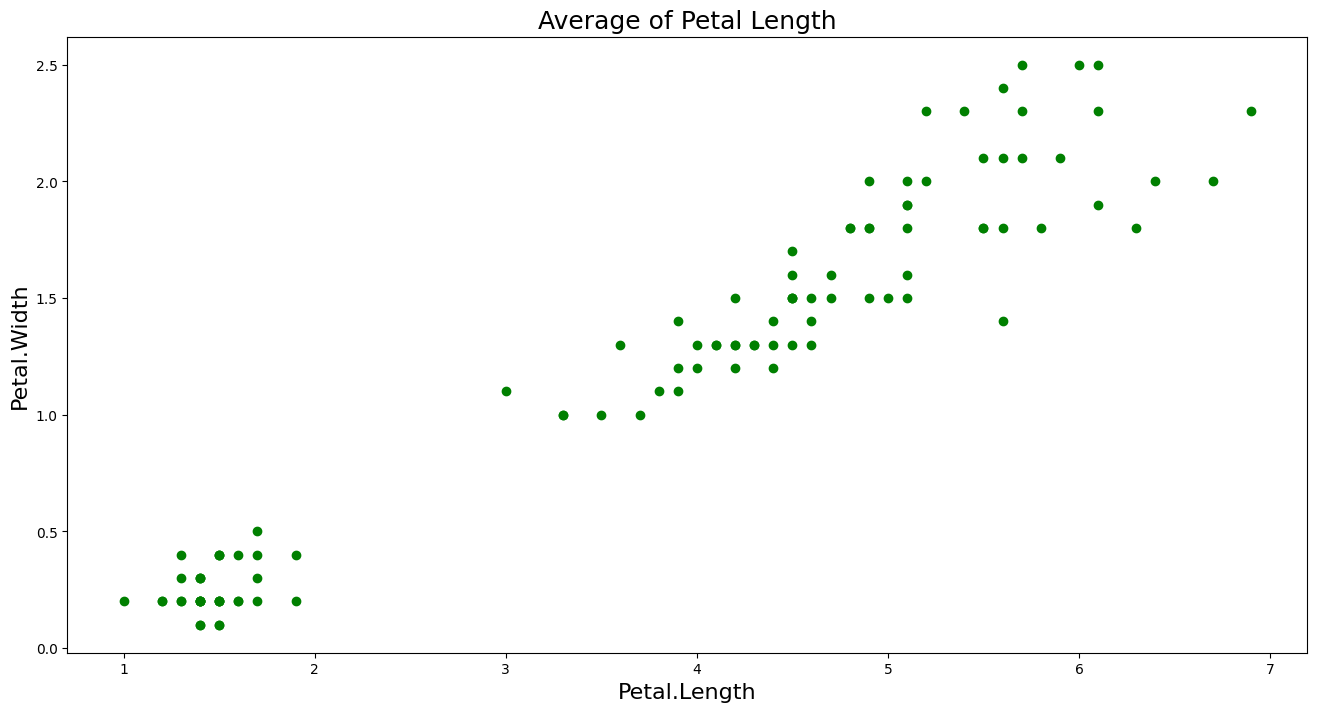

In [52]:
# lấy x, y
x = df_iris['Petal.Length'].values
y = df_iris['Petal.Width'].values
# Vẽ biểu đồ line độ dài cánh hoa trung bình giữa các loài hoa
plt.figure(figsize=(16, 8))
plt.scatter(x, y, color='green', )
plt.xlabel('Petal.Length', fontsize=16)
plt.ylabel('Petal.Width', fontsize=16)
plt.title("Average of Petal Length", fontsize=18)

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']


Text(0.5, 1.0, 'Boxplot of Dimensions')

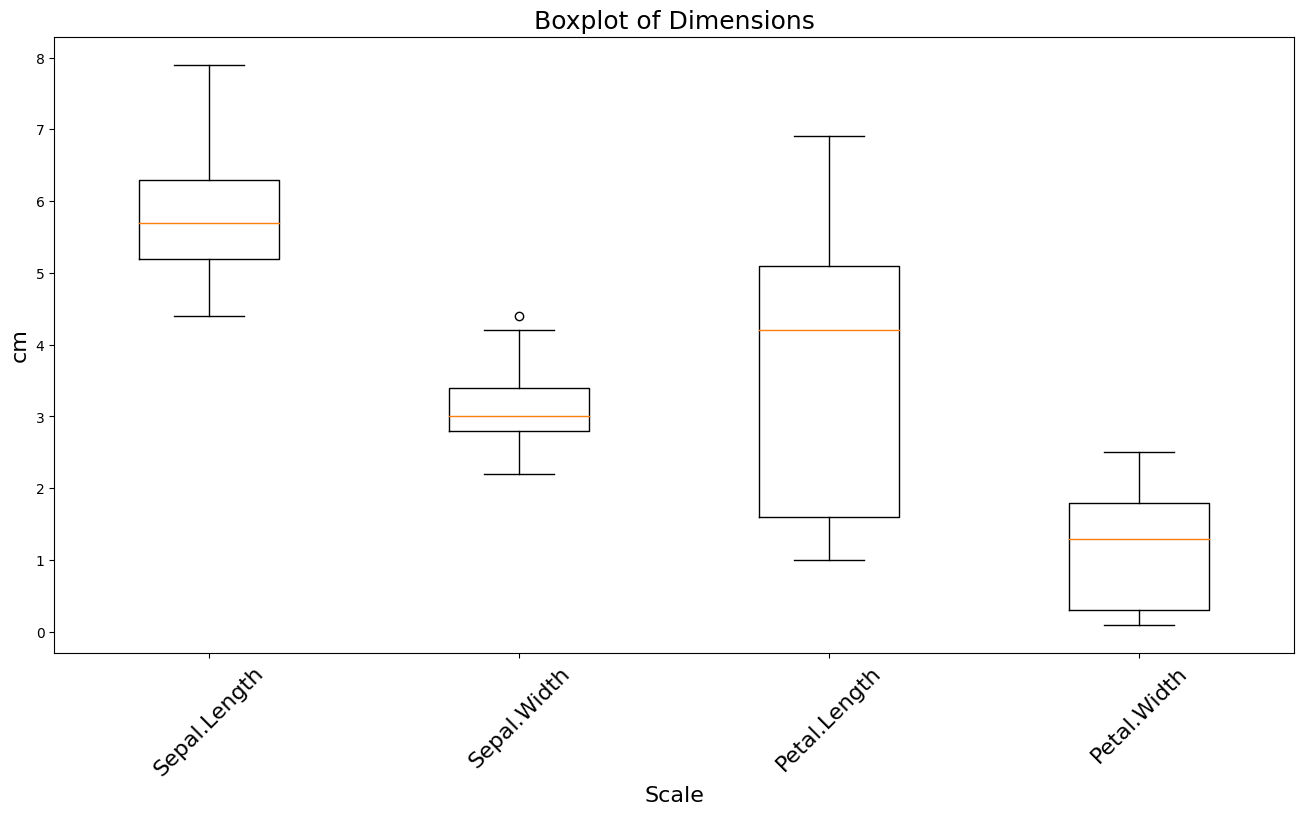

In [53]:
# Lấy ra list các chiều dimension cần khảo sát
dims = list(df_iris.select_dtypes('float').columns)
print(dims)

# Vẽ biểu đồ bboxplot
plt.figure(figsize=(16, 8))
plt.boxplot([df_iris[col] for col in dims])
plt.xlabel('Scale', fontsize=16)
plt.ylabel('cm', fontsize=16)
plt.xticks(np.arange(len(dims))+1, dims, rotation=45, fontsize=16)
plt.title("Boxplot of Dimensions", fontsize=18)

<Axes: >

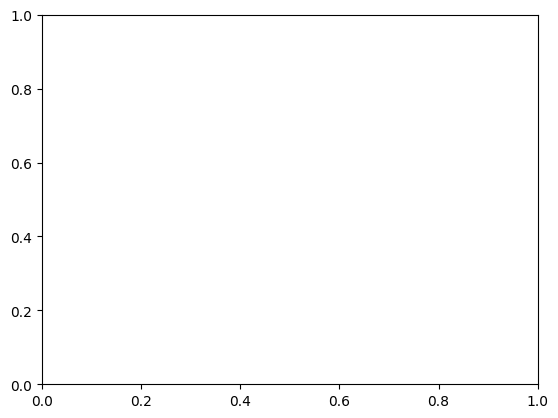

In [54]:
sns.swarmplot(
    x=None, 
    y=None, 
    hue=None, 
    data=None
)

Text(0.5, 1.0, 'Swarm of Dimensions')

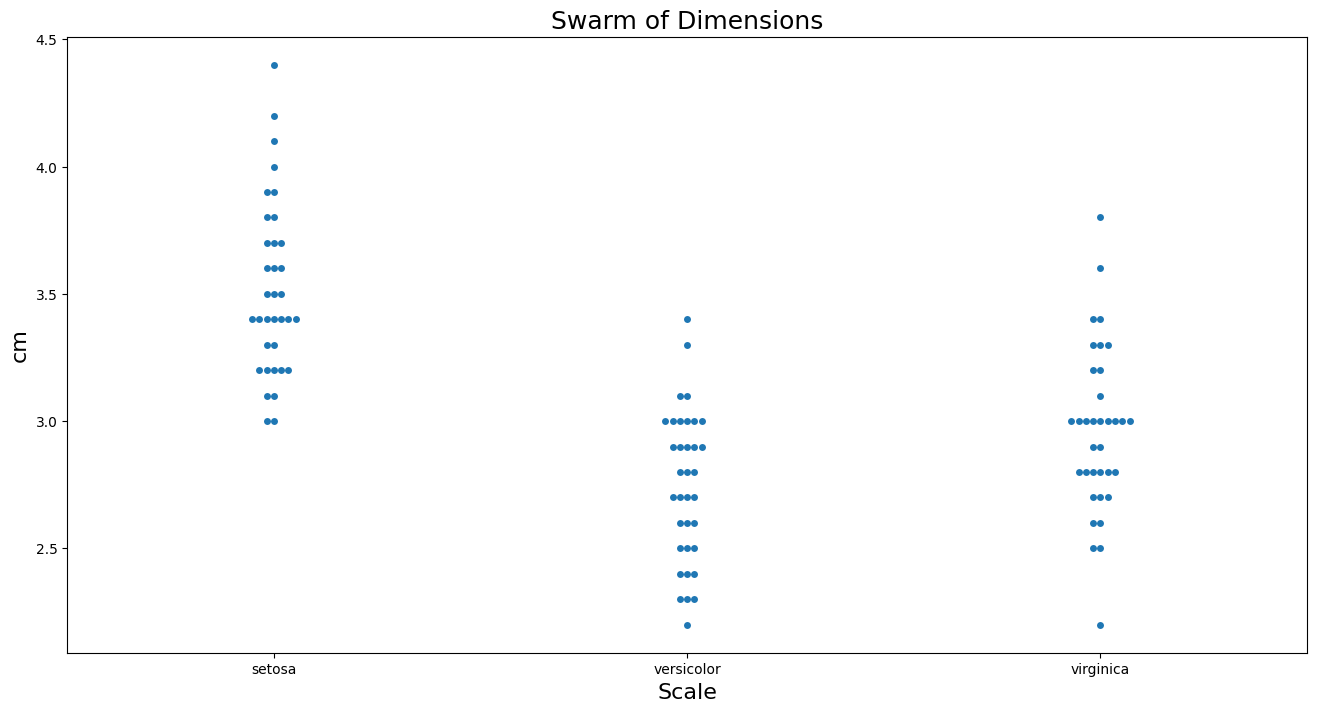

In [55]:
# Vẽ biểu đồ swarm
plt.figure(figsize=(16, 8))
sns.swarmplot(x='Species', y='Sepal.Width', data = df_iris)
plt.xlabel('Scale', fontsize=16)
plt.ylabel('cm', fontsize=16)
plt.title("Swarm of Dimensions", fontsize=18)

Text(0.5, 1.0, 'Swarm of Dimensions')

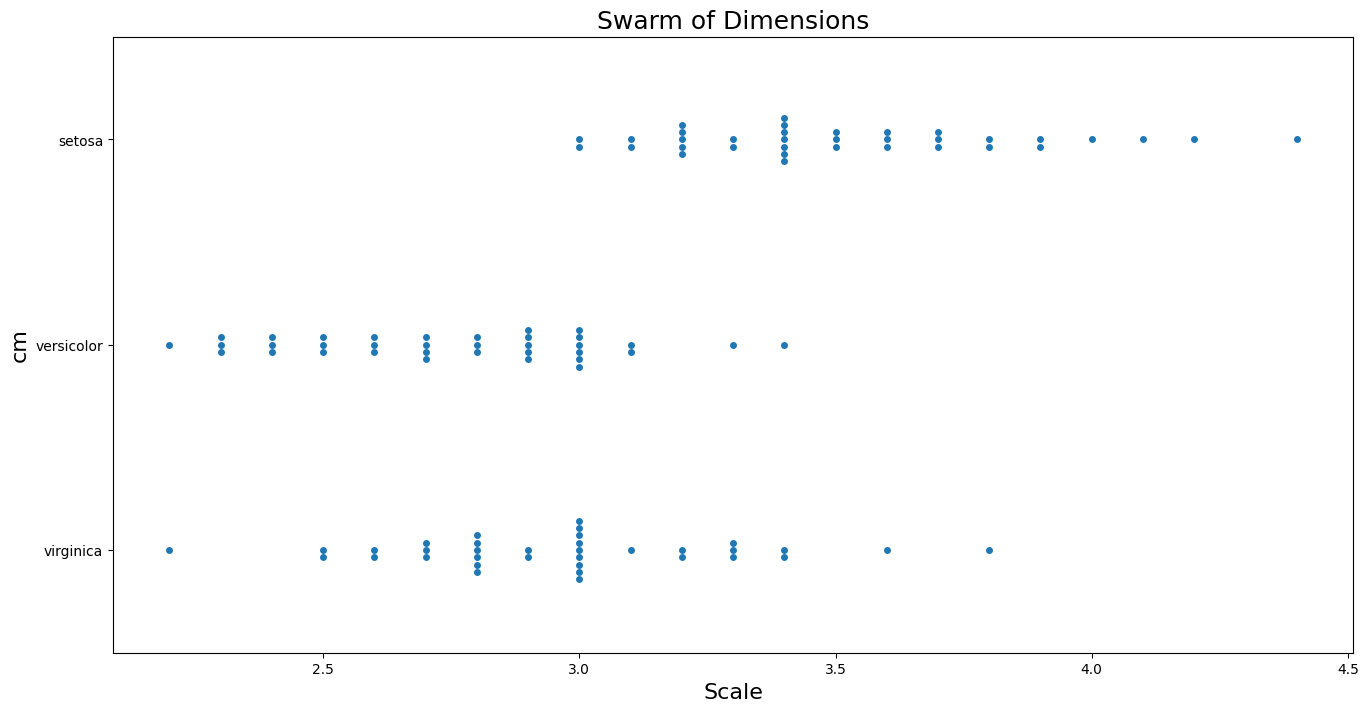

In [56]:
# Vẽ biểu đồ swarm
plt.figure(figsize=(16, 8))
sns.swarmplot(y='Species', x='Sepal.Width', data = df_iris)
plt.xlabel('Scale', fontsize=16)
plt.ylabel('cm', fontsize=16)
plt.title("Swarm of Dimensions", fontsize=18)

Text(0.5, 1.0, 'Swarnplot of Sepal.Width')

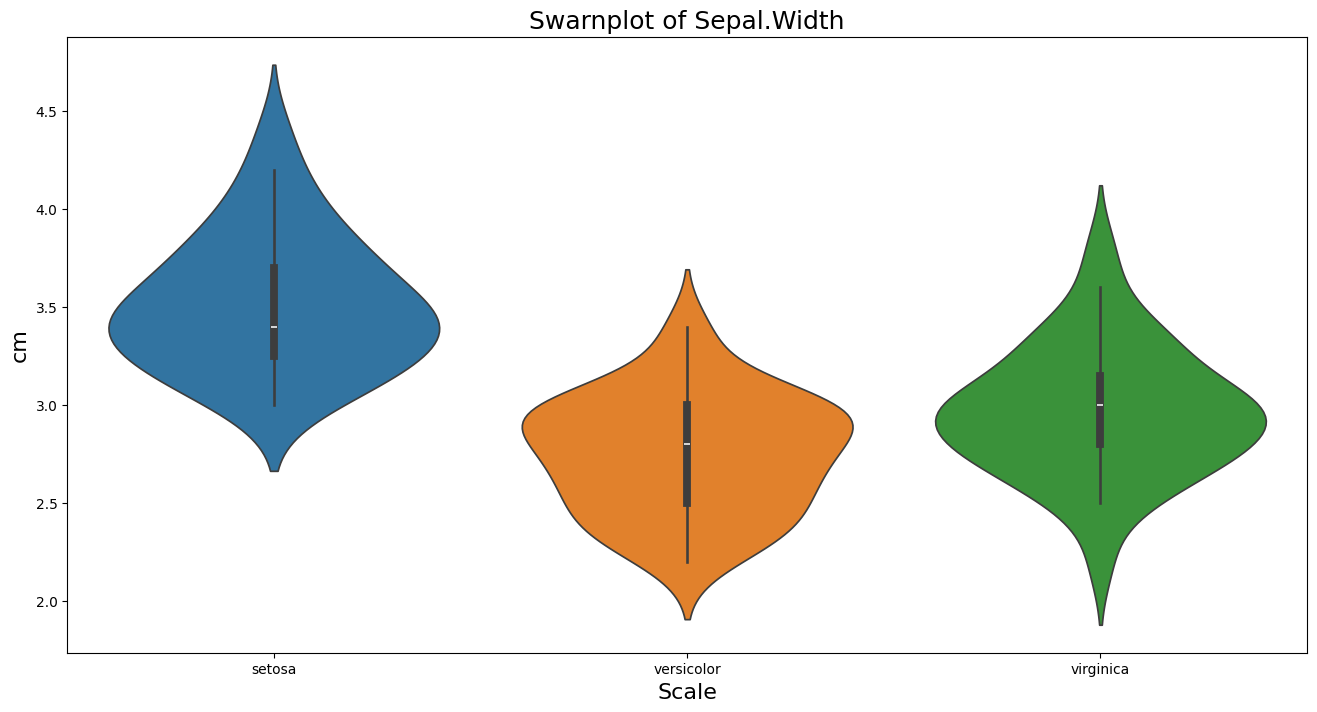

In [57]:
# Vẽ biểu đồ swarm
plt.figure(figsize=(16, 8))
sns.violinplot(x='Species', y='Sepal.Width', hue='Species', data = df_iris)
plt.xlabel('Scale', fontsize=16)
plt.ylabel('cm', fontsize=16)
plt.title("Swarnplot of Sepal.Width", fontsize=18)

Text(0.5, 1.0, 'Histogram of Sepal.Width')

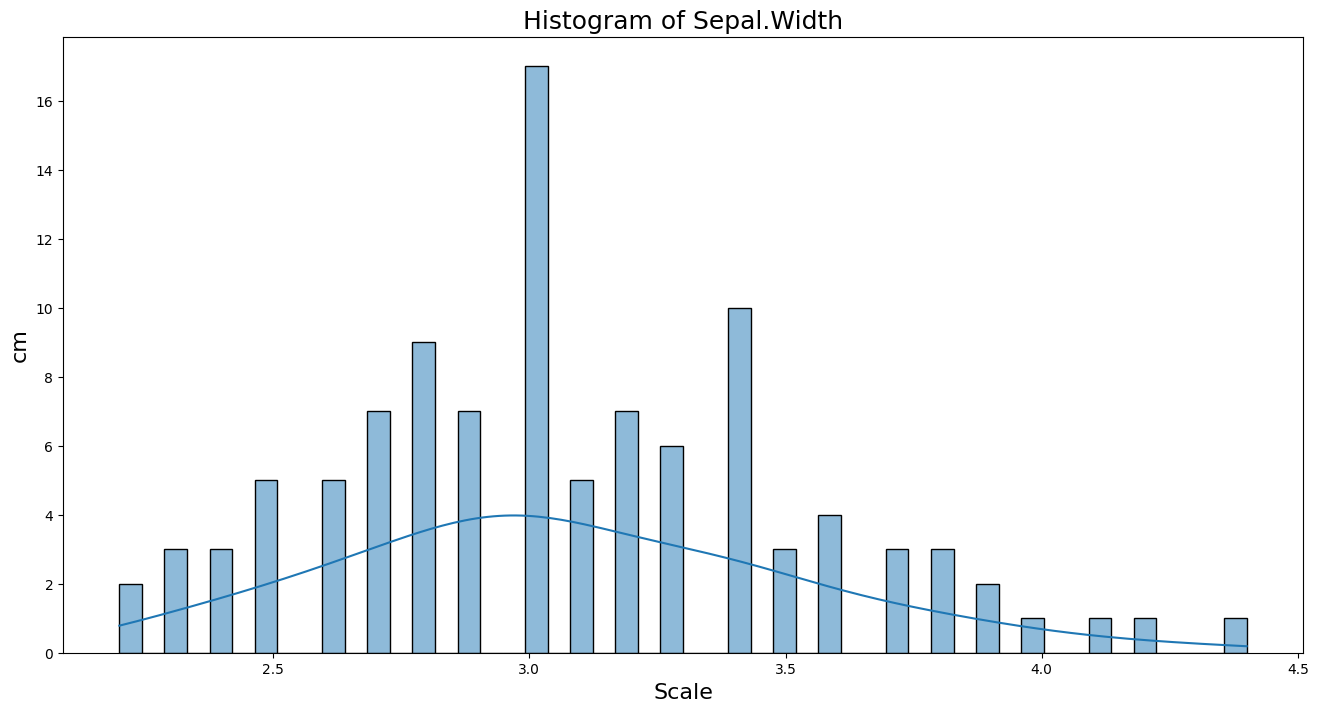

In [58]:
# Vẽ biểu đồ swarm
plt.figure(figsize=(16, 8))
sns.histplot(x='Sepal.Width', data = df_iris, bins=50, kde=True)
plt.xlabel('Scale', fontsize=16)
plt.ylabel('cm', fontsize=16)
plt.title("Histogram of Sepal.Width", fontsize=18)

In [59]:
df_summary = df_iris.groupby('Species').mean()
df_summary

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,5.071429,3.517143,1.471429,0.251429
versicolor,5.825714,2.748571,4.182857,1.311429
virginica,6.540000,2.962857,5.525714,1.988571


<Axes: ylabel='Species'>

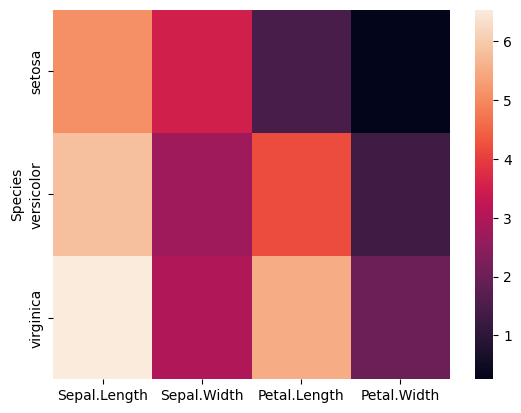

In [60]:
sns.heatmap(df_summary)